In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

from keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

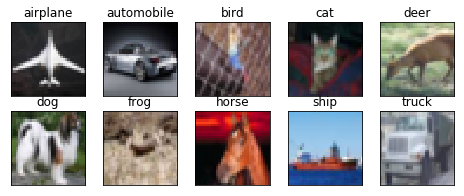

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
import keras.backend as K
def loss_with_reg(model, batch_size, _lambda = 0.001):
  reg_loss_sqr = 0
  for layer in model.layers:
    if len(layer.get_weights()) > 0:
      reg_loss_sqr += np.sum(layer.get_weights()[0]**2)
  reg_loss_sqr = reg_loss_sqr * (_lambda/2*batch_size)
    
  def temp(y_true,y_pred):
    return K.categorical_crossentropy(y_true, y_pred)+reg_loss_sqr
  return temp

## This is given code in assignment.

In [25]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_45 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_46 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 15, 15, 96)        41568     
__________

## Ran it for 100 epocs
- highest accuracy is __83.83__ at __93rd epoc__

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 23s 58ms/step - loss: 1.8743 - acc: 0.2805 - val_loss: 1.5486 - val_acc: 0.4246
Epoch 2/100
390/390 [==============================] - 20s 52ms/step - loss: 1.3677 - acc: 0.5027 - val_loss: 1.1426 - val_acc: 0.5884
Epoch 3/100
390/390 [==============================] - 20s 52ms/step - loss: 1.1289 - acc: 0.6027 - val_loss: 0.9710 - val_acc: 0.6625
Epoch 4/100
390/390 [==============================] - 20s 52ms/step - loss: 0.9694 - acc: 0.6637 - val_loss: 0.8687 - val_acc: 0.6996
Epoch 5/100
390/390 [==============================] - 20s 52ms/step - loss: 0.8777 - acc: 0.6979 - val_loss: 0.7857 - val_acc: 0.7268
Epoch 6/100
390/390 [==============================] - 20s 52ms/step - loss: 0.8045 - acc: 0.7244 - val_loss: 0.7744 - val_acc: 0.7314
Epoch 7/100
390/390 [==============================] - 20s 52ms/step - loss: 0.7394 - acc: 0.7452 - val_loss: 0.7117 - val_acc: 0.7570
Epoch 8/100
390/390 [==============================] - 

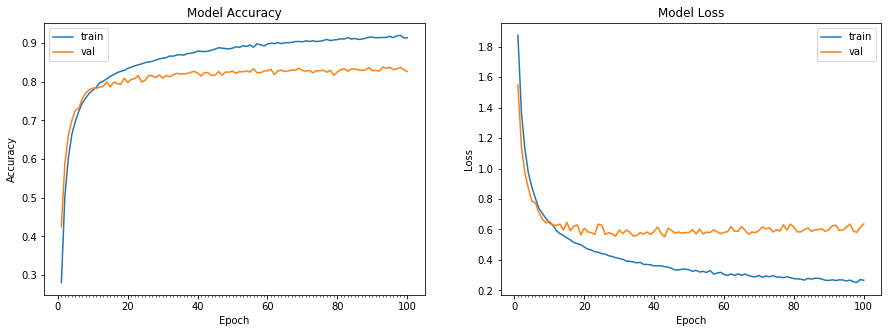

Accuracy on test data is: 82.65


In [27]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Assignment Solution model 

- Removed the dense layer because it cannot recognise the spacial features
- Added regularization , dropout and increased batch size to normalise the data to make the model converge validation accuracy quickly.
- Used a __Receptive field__ of __49__ 

> __Doubt__ : I have used receptive field less than this but why 49 RF gave better results even though many of the objects size in the images are around 32.

In [16]:
# Define the model
batch_size = 400
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))#32 # Channel Size
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.18))

model.add(Convolution2D(48, 3, 3))#30
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.18))

model.add(Convolution2D(64, 3, 3, border_mode='same'))#30
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.18))

model.add(MaxPooling2D(pool_size=(2, 2)))#15


model.add(Convolution2D(48, 1, 1))#15
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(64, 3, 3))#13
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.18))

model.add(Convolution2D(64, 3, 3, border_mode='same'))#13
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.18))

model.add(Convolution2D(96, 3, 3, border_mode='same'))#13
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.18))

model.add(MaxPooling2D(pool_size=(2, 2)))#6

model.add(Convolution2D(64, 1, 1))#6
model.add(BatchNormalization())
model.add(Activation('relu'))

#model.add(Dropout(0.25))

model.add(Convolution2D(128, 3, 3, border_mode='same'))#6
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.18))

model.add(Convolution2D(128, 3, 3))#4
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.18))

model.add(Convolution2D(128, 3, 3, border_mode='same'))#4
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.18))



model.add(Convolution2D(10, 4, 4))#1
model.add(Flatten())
model.add(Activation("softmax"))
# Compile the model
model.compile(optimizer='adam', loss=loss_with_reg(model,batch_size, _lambda = 0.0025), metrics=['accuracy'])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Kera

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
batch_normalization_23 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
batch_normalization_24 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
activation_26 (Activation)   (None, 30, 30, 48)        0         
__________

### Got a validation aaccuracy of 84 at 37th epoc and the above model have 83.83% at 93rd epoc
### Highest accuracy reached is 85.32


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=125, epochs=100)`
  from ipykernel import kernelapp as app


Epoch 1/100


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
125/125 [==============================] - 74s 590ms/step - loss: 840.5778 - acc: 0.3658 - val_loss: 842.0481 - val_acc: 0.2563
Epoch 2/100

Epoch 00002: LearningRateScheduler setting learning rate to 0.0024610336.
125/125 [==============================] - 68s 542ms/step - loss: 840.0388 - acc: 0.5613 - val_loss: 840.2938 - val_acc: 0.4785
Epoch 3/100

Epoch 00003: LearningRateScheduler setting learning rate to 0.0020862309.
125/125 [==============================] - 68s 543ms/step - loss: 839.8218 - acc: 0.6400 - val_loss: 840.6879 - val_acc: 0.4001
Epoch 4/100

Epoch 00004: LearningRateScheduler setting learning rate to 0.0018105009.
125/125 [==============================] - 68s 544ms/step - loss: 839.6803 - acc: 0.6899 - val_loss: 840.1516 - val_acc: 0.5400
Epoch 5/100

Epoch 00005: LearningRateScheduler setting learning rate to 0.0015991471.
125/125 [==============================] - 68s 541ms/step - loss: 839.57

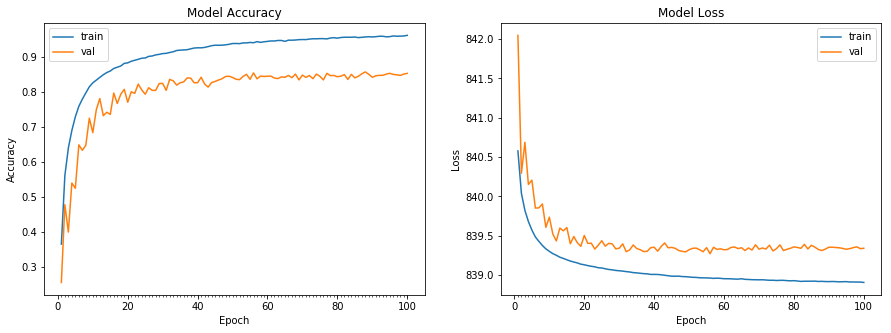

Accuracy on test data is: 85.31


In [18]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(featurewise_center=True,
                             featurewise_std_normalization=True,
                             zoom_range=0.0, 
                             horizontal_flip=True)

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.219 * epoch), 10)
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = batch_size),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks = [LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))#76 rf 40


In [0]:
model.save("improved.hd5")